# DS 1001: Think Like a Data Scientist


This notebook takes the place of slides for the lecture on 2025-04-22 entitled "Classifier Examples". It is a follow on to the ML Classifier sequence which started with a lecture on Decision Trees followed by a lab and a lecture and lab on kNN.

Key concepts before begining:
* ML Taxonomy
    * Supervised Learning
    * Classification
* Classifier Workflow
    * Define the Problem
    * Establish the Data
    * Train
    * Test
* Decision Tree
* kNN

Our goal with these examples is to develop an intuitive understanding of the ML Classification workflow. This will be demonstrated by training a Decision Tree and kNN model. 

**Purpose:** Reinforce (with code) the ML Classification workflow.

---

## Data Science ---> Analytics Module
![](analytics.png)

Our framing for the analytics module is that it is all about pattern recognition. Humans are built to recognize patterns, but not in a string of 1s and 0s that is millions of bits long (and if we're serious, way way longer than that). We will be using the power of our computer systems to apply mathematical pattern recognition algorithms to those 1s and 0s. Of course there is always the challenge of getting those patterns back out as useful information, but that is the purview of what we call Design.

---

## ML Classification Refresher
For this work we will be using machine learning to classify our data. This is a supervised ML approach and as a result we use the following workflow:
1. Define the Problem
2. Establish the Data
    * Identify Features and Targets
    * Split Train/Test
3. Train the model
4. Test the model

---

# Rite of Passage
As humans grow in a culture they undergo common experiences and learn their culture at a deeper level. These events are what anthropologists would call **Rites of Passage**. A classic American example is passing your Driver's License Test.

For many of you, today is a day of a rite of passage. A moment where you will encounter a core part of data science culture and be brought deeper into our world.

Today we are talking about **THE IRIS DATASET**

## Fisher's/Anderson's Iris Data set
This data set comes to us from the 1930's (and yes, there are some problematic origins). Since that time this data set has been used so much that it now cannot be avoided in the data science world. If you are looking for a shibboleth for data science, this data set fits the bill. Just ask "what do you think of the iris data"? You will be guranteed to get a strong response.

Formally it is tabular data from the domain of Biology typically used for classification. There are 150 instances with 4 features and a target.
* sepal length
* sepal width
* petal length
* petal width
* class

![](iris.png)

# Have you read the rubric for the ESSY assignment?
### Promoted Cell

You should check out the ESSY rubric. The assignment serves as the final assignment for the class and is due on April 29. In the rubric you will notice it consists of 3 parts and that each part requires a figure. Today we focus on part 3, the future of Data Science.

Link to rubric - [link](https://myuva.sharepoint.com/:w:/s/DS1001/Ecxqj0AISdRGmK9572bp2jkBrZUon5iujtg70oOmkVIrxQ?e=JfCsVh)

---

In [86]:
# import packages
import ucimlrepo as uci
import sklearn.model_selection as sklm
import sklearn.neighbors as skln
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import sklearn.metrics as sklme
import pandas as pd


In [63]:
# Define the Problem - Train a classifier for the iris dataset
# Establish Data - Use UC Irvine Machine Learning Respository - https://archive.ics.uci.edu/, https://github.com/uci-ml-repo/ucimlrepo

# Fetch the Data 
iris = uci.fetch_ucirepo(id=53)

# Collect features, and targets (N.B. many would use X and y instead of features and targets)
instances = iris.data.original
features = iris.data.features 
targets = iris.data.targets

# Explore features
display(instances)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


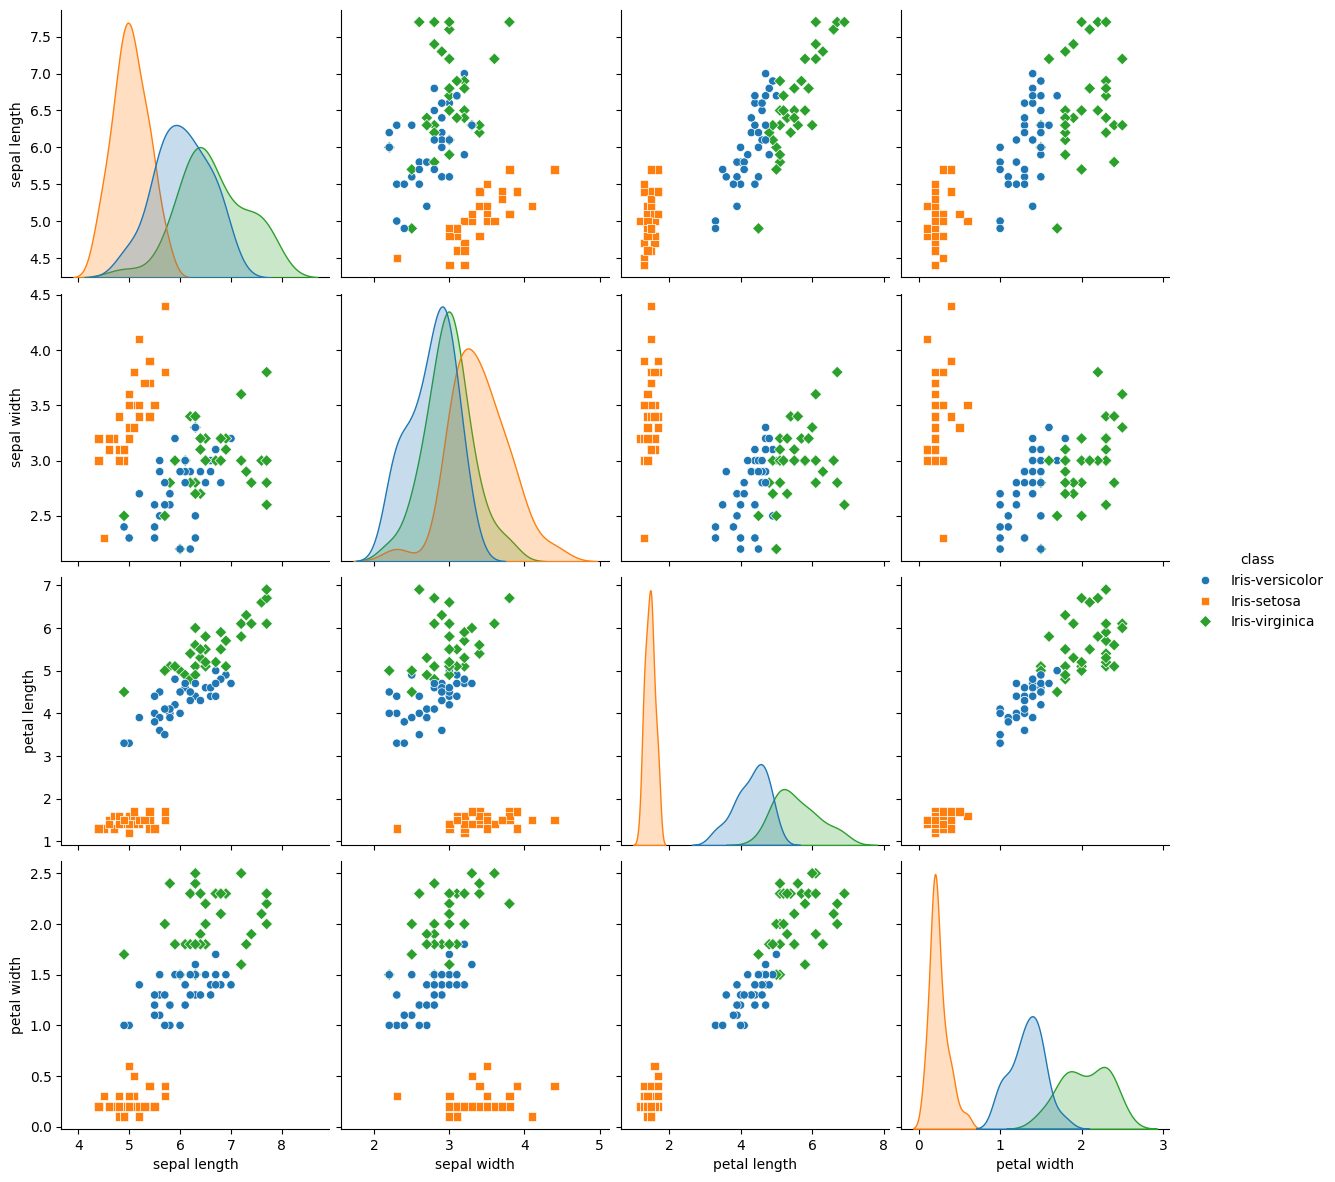

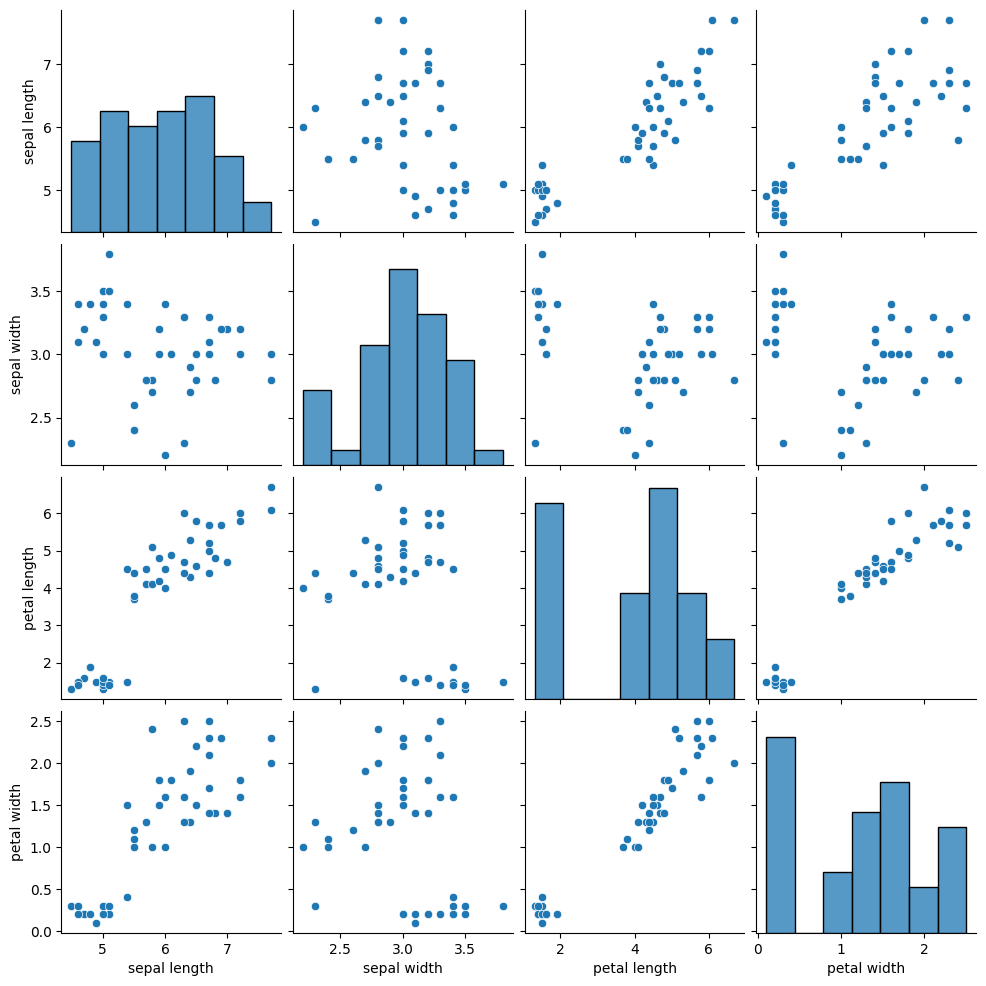

In [64]:
# Explore the Training and Testing Data
sns.pairplot(instances.sample(frac=0.7), hue = "class", size=3, markers=["o", "s", "D"])
sns.pairplot(instances.sample(frac=0.3))

In [65]:
# Split data into Training and Testing
features_train, features_test, targets_train, targets_test = sklm.train_test_split(features, targets, test_size=0.3, stratify=targets)

# Explore the split
print("\nThe splittraining data are organized into a",type(features_train),".\n")
display(features_train)   
targets_train.value_counts()


The splittraining data are organized into a <class 'pandas.core.frame.DataFrame'> .



,sepal length,sepal width,petal length,petal width
1,4.9,3.0,1.4,0.2
24,4.8,3.4,1.9,0.2
67,5.8,2.7,4.1,1.0
88,5.6,3.0,4.1,1.3
119,6.0,2.2,5.0,1.5
...,...,...,...,...
40,5.0,3.5,1.3,0.3
92,5.8,2.6,4.0,1.2
17,5.1,3.5,1.4,0.3
20,5.4,3.4,1.7,0.2


class          
Iris-setosa        35
Iris-versicolor    35
Iris-virginica     35
Name: count, dtype: int64

In [23]:
# Train the model in 2 dimensions for easy viz ([["petal length", "petal width"]])
kNN_model = skln.KNeighborsClassifier(n_neighbors=5)
kNN_model.fit(features_train[["petal length", "petal width"]],targets_train)

KNeighborsClassifier()

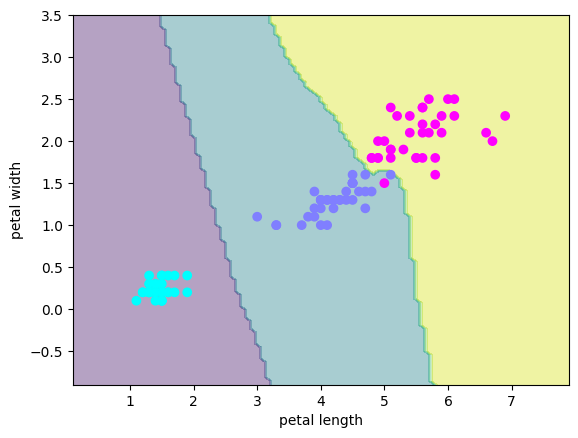

In [84]:
DecisionBoundaryDisplay.from_estimator(kNN_model,features_train[["petal length", "petal width"]],alpha=0.4,response_method="predict")

# Show boundary with training data and testing data
plt.scatter(features_train["petal length"],features_train["petal width"],c=targets_train['class'].astype('category').cat.codes,cmap='cool')
#plt.scatter(features_test["petal length"],features_test["petal width"])

In [80]:
# Make predictions for testing data
predictions_test = kNN_model.predict(features_test[["petal length", "petal width"]])
display(predictions_test)

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

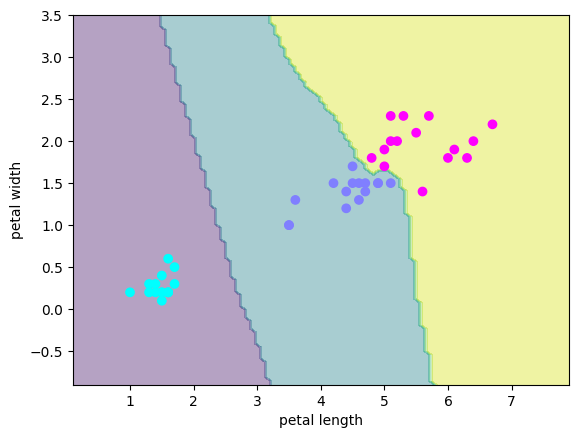

In [ ]:
# Plot test data with predicted classes
DecisionBoundaryDisplay.from_estimator(kNN_model,features_train[["petal length", "petal width"]],alpha=0.4,response_method="predict")
plt.scatter(features_test["petal length"],features_test["petal width"],c=pd.Series(predictions_test).astype('category').cat.codes,cmap='cool')

In [87]:
# Evalutate the model
sklme.accuracy_score(targets_test,predictions_test)

0.9111111111111111

In [95]:
# Choosing the best K
# Train the model for 7 values of k using all 4 features
_1NN_model = skln.KNeighborsClassifier(n_neighbors=1)
_3NN_model = skln.KNeighborsClassifier(n_neighbors=3)
_5NN_model = skln.KNeighborsClassifier(n_neighbors=5)
_7NN_model = skln.KNeighborsClassifier(n_neighbors=7)
_9NN_model = skln.KNeighborsClassifier(n_neighbors=9)
_11NN_model = skln.KNeighborsClassifier(n_neighbors=11)
_13NN_model = skln.KNeighborsClassifier(n_neighbors=13)

_1NN_model.fit(features_train,targets_train)
_3NN_model.fit(features_train,targets_train)
_5NN_model.fit(features_train,targets_train)
_7NN_model.fit(features_train,targets_train)
_9NN_model.fit(features_train,targets_train)
_11NN_model.fit(features_train,targets_train)   
_13NN_model.fit(features_train,targets_train)

# Make predictions for testing data
_1NN_predictions_test = _1NN_model.predict(features_test)
_3NN_predictions_test = _3NN_model.predict(features_test)
_5NN_predictions_test = _5NN_model.predict(features_test)
_7NN_predictions_test = _7NN_model.predict(features_test)
_9NN_predictions_test = _9NN_model.predict(features_test)
_11NN_predictions_test = _11NN_model.predict(features_test)
_13NN_predictions_test = _13NN_model.predict(features_test)
# Evalutate the model
print("k=1: ",sklme.accuracy_score(_1NN_predictions_test,targets_test))
print("k=3: ",sklme.accuracy_score(_3NN_predictions_test,targets_test))
print("k=5: ",sklme.accuracy_score(_5NN_predictions_test,targets_test))
print("k=7: ",sklme.accuracy_score(_7NN_predictions_test,targets_test))
print("k=9: ",sklme.accuracy_score(_9NN_predictions_test,targets_test))
print("k=11: ",sklme.accuracy_score(_11NN_predictions_test,targets_test))
print("k=13: ",sklme.accuracy_score(_13NN_predictions_test,targets_test))

# N.B. this is bad bad bad code. We should be using a loop. but the AI generated it this way. :judgemental professor eyes:

k=1:  0.9111111111111111
k=3:  0.9111111111111111
k=5:  0.9111111111111111
k=7:  0.9333333333333333
k=9:  0.9555555555555556
k=11:  0.9111111111111111
k=13:  0.9111111111111111


In [ ]:
# If time, we'll do it live for decision trees.

---

# Reminder: Thursday 4/24 is Office Hours
### Promoted Cell

We will not meet for lecture on 4/24, aka Thursday. That time will be converted to office hours. If you have been putting off a necessary office hours visit, this is a prime time to take care of that.